# Análisis de Datos del Dataset Monopoly

# Fase 1: Entendiendo el Negocio

Contexto: El análisis se centra en comprender el comportamiento financiero de los clientes de Monopoly, utilizando un enfoque en la predicción de su facturación futura (Fac_T12). Este dato es clave para evaluar cuánto dinero un cliente generará en ingresos para la empresa a través del uso de productos financieros como tarjetas de crédito (TC) y débito (TD). La facturación refleja los montos totales gastados por los clientes en transacciones nacionales, internacionales, y avances de crédito, proporcionando una visión integral de su valor para la organización.

Objetivos:

1. Identificar los factores que influyen en la facturación, como la renta, la antigüedad y la actividad transaccional del cliente.

2. Desarrollar un modelo predictivo que permita estimar la facturación futura de los clientes, basado en patrones históricos.

3. Segmentar a los clientes según su valor financiero proyectado, enfocándose en aquellos con mayor potencial de facturación.

4. Proporcionar información que permita a la empresa diseñar estrategias personalizadas para retención y maximización de ingresos.

Importancia: La predicción de la facturación no solo permite anticipar flujos de ingresos, sino también optimizar recursos al focalizar esfuerzos en clientes de alto valor. Esto ayuda a mejorar la fidelización y aumentar el retorno de inversión en campañas de marketing y promociones.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:/Users/victo/OneDrive/Escritorio/monopoly/monopoly/monopoly/data/01_raw/Base_clientes_Monopoly_actualizado-0.xlsx", engine='openpyxl')

In [4]:
dfo = df.copy()

## Fase 2: Exploración Inicial del Dataset

Revisaremos la estructura del dataset, los primeros registros y las estadísticas generales. Incluiremos visualizaciones para variables clave.

muestra el número total de filas y columnas del dataset en formato (filas, columnas).

In [5]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (51124, 574)


Entrega los nombres de las columnas 

In [6]:
print(f'Nombre de las columnas: {df.columns.tolist()}')

Nombre de las columnas: ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


Genera estadísticas descriptivas para todas las columnas, como promedio, mediana, valores mínimos y máximos (para numéricas), y conteos o valores únicos (para categóricas).

In [8]:
df.describe(include='all')

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
count,51124.000000,51124.000000,51123,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124,51124.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN
freq,NaN,NaN,27410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38269,NaN
mean,25562.500000,182.024274,NaN,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,NaN,0.089977
std,14758.371918,29.276596,NaN,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,NaN,0.286152
min,1.000000,151.000000,NaN,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,NaN,0.000000
25%,12781.750000,160.000000,NaN,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,NaN,0.000000
50%,25562.500000,170.000000,NaN,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,NaN,0.000000
75%,38343.250000,210.000000,NaN,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,NaN,0.000000


 útil para inspeccionar rápidamente el tamaño del dataset.

In [9]:
df.shape

(51124, 574)

Muestra las primeras 30 filas del dataset para observar cómo están estructurados los datos iniciales.

In [10]:
df.head(30)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.00,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.00,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.00,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.00,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.00,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.00,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.00,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.00,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.00,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.00,12084,0.00,R,0


Muestra una lista con los nombres de todas las columnas en el dataset.


In [11]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

Muestra las últimas 5 filas del dataset, útil para verificar cómo terminan los datos.


In [12]:
df.tail()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0
51123,51124,170,H,13.0,51,840878.0,75,1,1,0,...,0.0,12360,0.0,12360.0,0.0,18500.0,0,0.0,R,0


Muestra cómo están distribuidos los valores de ingresos (Renta) entre los clientes, lo que permite identificar sesgos o concentraciones en rangos específicos.

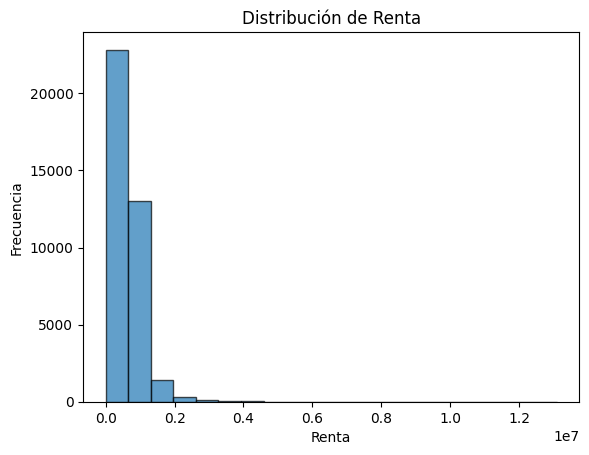

In [13]:
# Gráfico 1: Histograma de Renta
plt.hist(df['Renta'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()

Representa visualmente la cantidad de clientes por región, ayudando a identificar las regiones con mayor o menor cantidad de clientes.

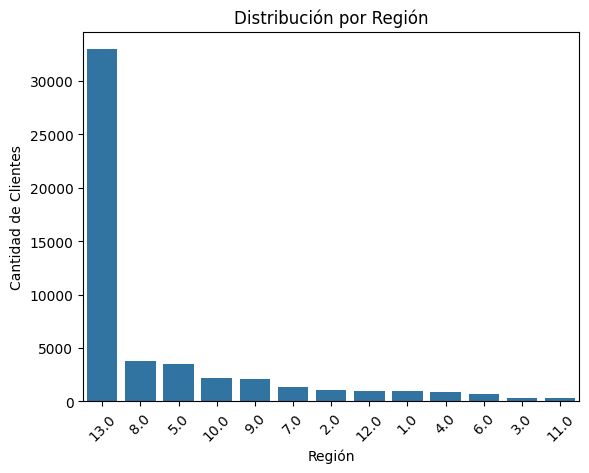

In [14]:
# Gráfico 2: Barras para la distribución por región
sb.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

Ilustra cómo se distribuyen los años de antigüedad de los clientes con una curva de densidad suave, útil para analizar tendencias generales.

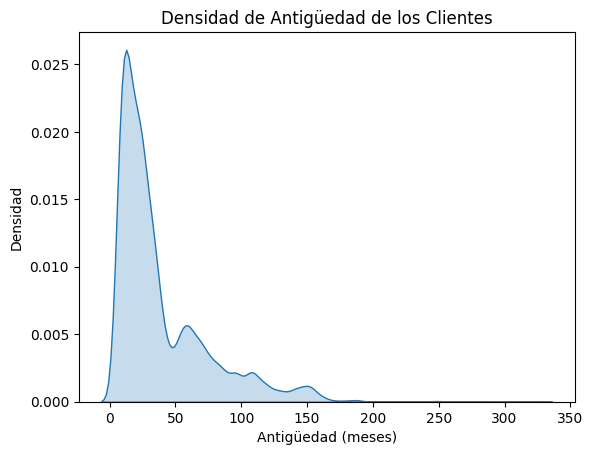

In [15]:
# Gráfico 3: Densidad de Antigüedad
sb.kdeplot(data=df, x='Antiguedad', fill=True)
plt.title('Densidad de Antigüedad de los Clientes')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.show()

Proporciona una visión general de cómo están distribuidas las edades de los clientes en el dataset, permitiendo identificar grupos de edad dominantes

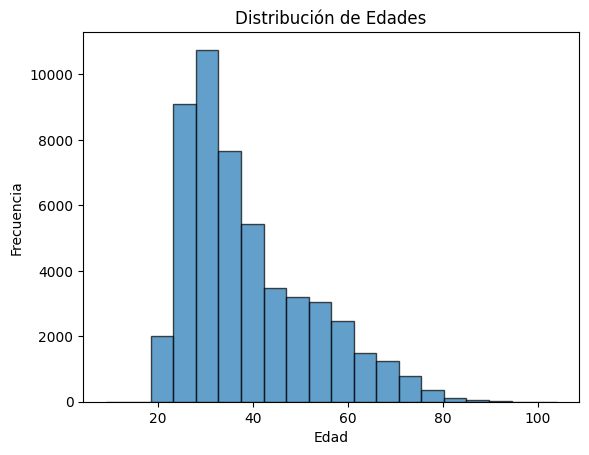

In [16]:
# Histograma de edades
plt.hist(df['Edad'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Examina la relación entre la edad de los clientes y sus ingresos (Renta), buscando patrones o tendencias.

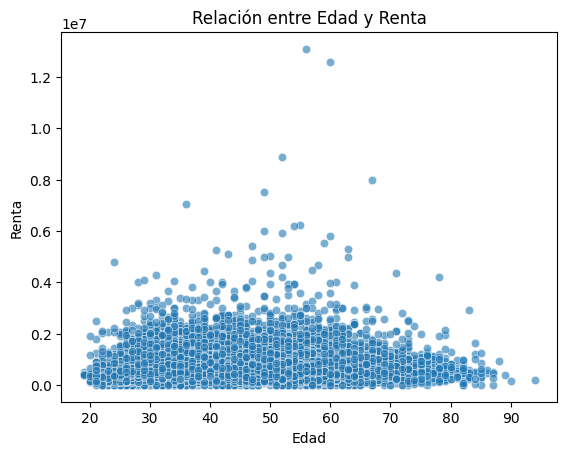

In [17]:
# Gráfico 4: Dispersión entre Edad y Renta
sb.scatterplot(data=df, x='Edad', y='Renta', alpha=0.6)
plt.title('Relación entre Edad y Renta')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.show()

Muestra la distribución de clientes por género (Sexo), permitiendo analizar si existe algún sesgo en la proporción de géneros.

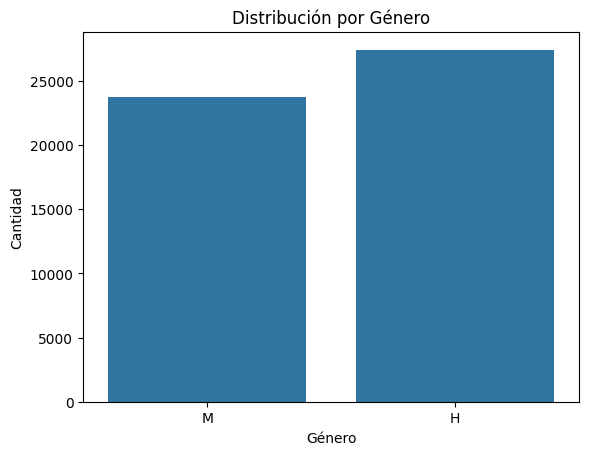

In [18]:

# Gráfico de barras para género
sb.countplot(data=df, x='Sexo')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Permite comparar la distribución de los ingresos (Renta) entre géneros, ayudando a identificar diferencias significativas.

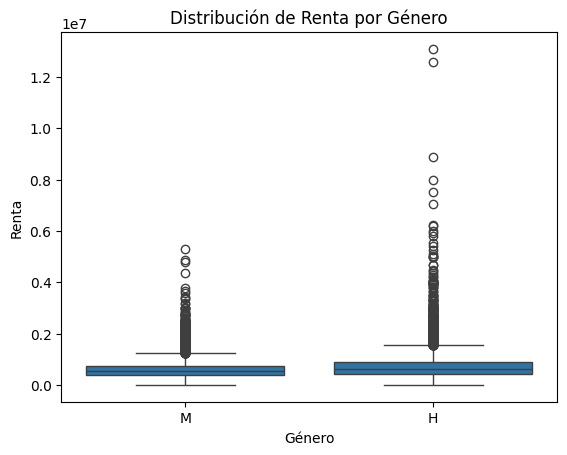

In [19]:
# Gráfico 5: Boxplot de Renta por Género
sb.boxplot(data=df, x='Sexo', y='Renta')
plt.title('Distribución de Renta por Género')
plt.xlabel('Género')
plt.ylabel('Renta')
plt.show()

Indica cuántos clientes utilizan un solo producto (Monoproducto) 

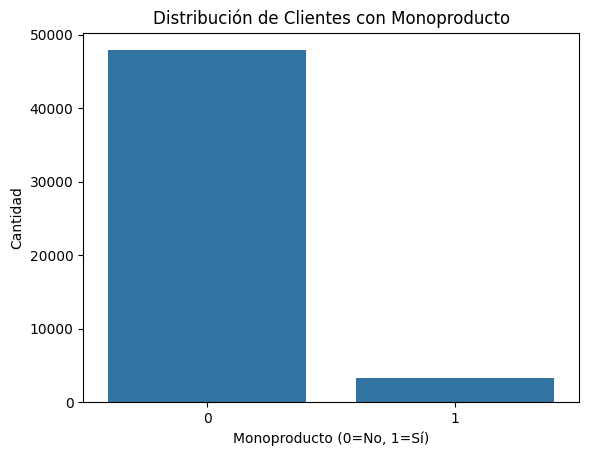

In [20]:
# Gráfico 6: Barras para Monoproducto
sb.countplot(data=df, x='Monoproducto')
plt.title('Distribución de Clientes con Monoproducto')
plt.xlabel('Monoproducto (0=No, 1=Sí)')
plt.ylabel('Cantidad')
plt.show()

Explora cómo los créditos totales se relacionan con la edad de los clientes, buscando patrones de consumo según la etapa de vida.

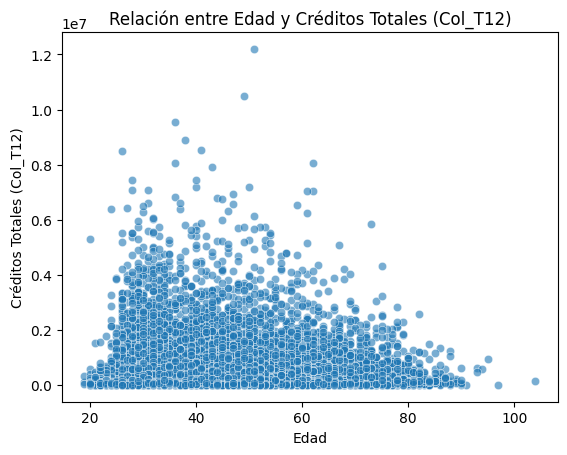

In [21]:
# Gráfico 7: Dispersión entre Col_T12 y Edad
sb.scatterplot(data=df, x='Edad', y='Col_T12', alpha=0.6)
plt.title('Relación entre Edad y Créditos Totales (Col_T12)')
plt.xlabel('Edad')
plt.ylabel('Créditos Totales (Col_T12)')
plt.show()

Finalmente creamos un dataset filtrado por las columnas que nosotros consideramos que utilizaremos a futuro y que son las que realmente nos aportan en los analisis.

In [22]:
# Definir columnas esenciales y relevantes para mantener
columnas_a_mantener = [
    # Esenciales
    'Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
    'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12',
    'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12',
    # Relevantes
    'Region', 'Renta', 'Antiguedad',
    'CUPO_L1','CUPO_MX', 'Adicional', 'Monoproducto', 
    'Dualidad', 'Internauta', 'Txs_T12', 'FlgAct_T12'
]

# Filtrar el dataset para conservar solo las columnas necesarias
df_filtrado = df[columnas_a_mantener]

# Mostrar las nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset:", df_filtrado.shape)

# Verificar columnas restantes
print("Columnas restantes en el dataset filtrado:")
print(df_filtrado.columns)


Nuevas dimensiones del dataset: (51124, 23)
Columnas restantes en el dataset filtrado:
Index(['Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
       'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12', 'UsoL1_T12',
       'UsoL2_T12', 'UsoLI_T12', 'Region', 'Renta', 'Antiguedad', 'CUPO_L1',
       'CUPO_MX', 'Adicional', 'Monoproducto', 'Dualidad', 'Internauta',
       'Txs_T12', 'FlgAct_T12'],
      dtype='object')


Hacemos este codigo para conocer los valores nulos que tenemos en nuestras columnas del datasetr filtrado y asi posteriormente trabjar con eso y preparar los datos.

In [23]:
# Identificar valores nulos en el dataset filtrado
valores_nulos = df_filtrado.isnull().sum()
print("\nValores nulos por columna en el dataset filtrado:")
print(valores_nulos[valores_nulos > 0])



Valores nulos por columna en el dataset filtrado:
Fac_T12         8251
FacAI_T12       8251
FacAN_T12       8251
FacCCOT_T12     8251
FacCCPC_T12     8251
FacCI_T12       8251
FacCN_T12       8251
PagoNac_T12     8251
PagoInt_T12     8251
UsoL1_T12       8251
UsoL2_T12       8251
UsoLI_T12       8251
Region            53
Renta          13365
Txs_T12         8251
FlgAct_T12      8251
dtype: int64


# PHASE 3: DATA PREPARATION

En esta fase, trabajaremos en la limpieza y transformación del dataset para asegurar que esté listo para análisis y modelado. Esto incluye:

1. Eliminar columnas con datos incompletos o irrelevantes.

2. Manejar valores nulos para evitar sesgos en los resultados.

3. Transformar datos categóricos en formatos numéricos.

4. Detectar y tratar valores atípicos (outliers).

5. Normalizar las variables para mejorar el rendimiento de los modelos.


Identificamos las columnas con valores nulas y mostramos la cantidad.

Usamos la mediana para columnas numéricas como Renta y un valor categórico para Region para evitar eliminar registros.

In [24]:
# Imputación de valores nulos
df_filtrado['Renta'] = df_filtrado['Renta'].fillna(df['Renta'].median())  # Mediana para ingresos
df_filtrado['Region'] = df_filtrado['Region'].fillna('Desconocido')      # Categoría 'Desconocido'


C:\Users\victo\AppData\Local\Temp\ipykernel_29684\376897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Renta'] = df_filtrado['Renta'].fillna(df['Renta'].median())  # Mediana para ingresos
C:\Users\victo\AppData\Local\Temp\ipykernel_29684\376897011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Region'] = df_filtrado['Region'].fillna('Desconocido')      # Categoría 'Desconocido'


Antes de limpiar outliers Y detectamos outliers visualmente con un boxplot 

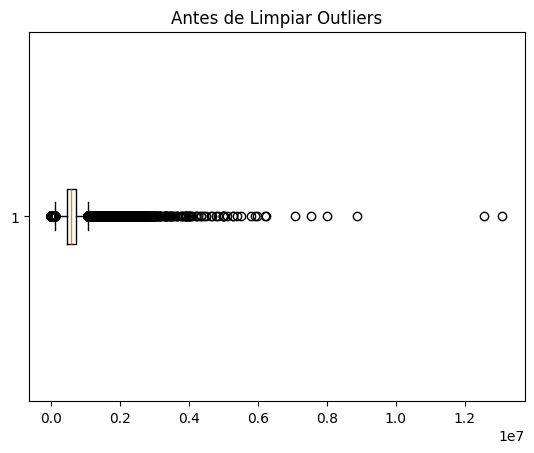

In [25]:
# Antes de limpiar outliers
plt.boxplot(df_filtrado['Renta'].dropna(), vert=False)
plt.title('Antes de Limpiar Outliers')
plt.show()


usamos el rango intercuartil (IQR) para eliminarlos o ajustarlos.


In [26]:
# Eliminar o ajustar outliers en Renta
q1 = df_filtrado['Renta'].quantile(0.25)
q3 = df_filtrado['Renta'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartil
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df = df[(df['Renta'] >= limite_inferior) & (df['Renta'] <= limite_superior)]


 El heatmap resalta dónde hay valores faltantes en el dataset.

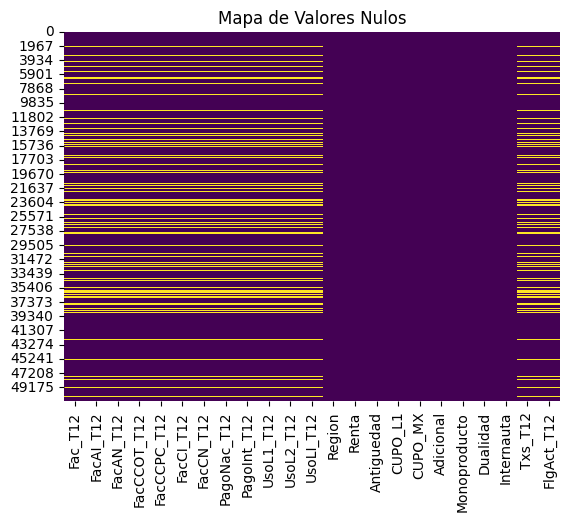

In [27]:
# Visualización de valores nulos
sb.heatmap(df_filtrado.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()


Después de limpiar outliers


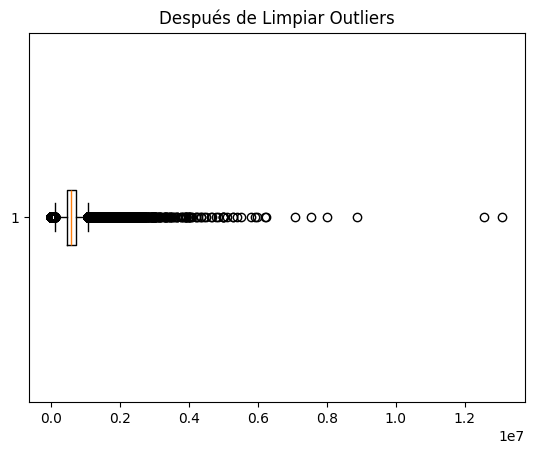

In [28]:
# Después de limpiar outliers
plt.boxplot(df_filtrado['Renta'], vert=False)
plt.title('Después de Limpiar Outliers')
plt.show()

Confirma que la distribución de una variable clave sigue siendo coherente tras la limpieza.

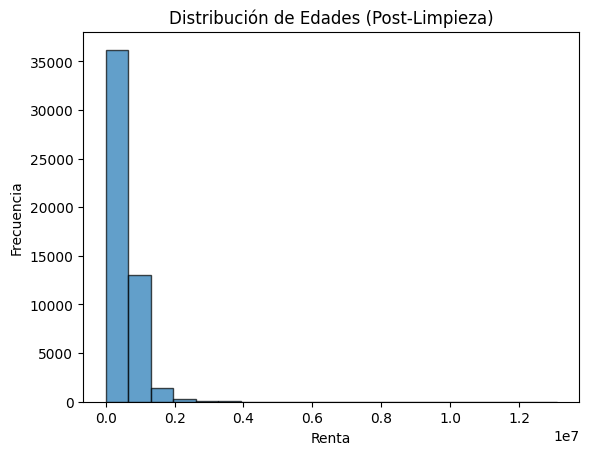

In [29]:
# Distribución de Edad después de limpieza
plt.hist(df_filtrado['Renta'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edades (Post-Limpieza)')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()


Eliminamos todos los valores nulos que puedan exisitir en Fact_T12

In [30]:
# Eliminar únicamente las filas donde 'Fac_T12' sea nulo
df_filtrado = df_filtrado[df_filtrado['Fac_T12'].notnull()]

Y posterior a eso verificamos si esto funciono,donde el resultado nos inidca que efectivamente ahora hay 0 valores nulos en esta columna.

In [31]:
# Contar valores nulos en 'Fac_T12'
nulos_fact_12 = df_filtrado['Fac_T12'].isnull().sum()
print(f"Número de valores nulos en 'Fac_T12': {nulos_fact_12}")


Número de valores nulos en 'Fac_T12': 0


Transformamos los datos de sexo,pasandolo de letras en este caso: M Y H a 1,2 correspondentiemente y 0 para valores nulos

In [32]:
# Mapear valores de 'Sexo'
sexo_mapping = {'M': 1, 'H': 2}  # 1 para masculino, 2 para femenino

# Transformar los valores y rellenar valores nulos con 0
df['Sexo'] = (
    df['Sexo']
    .map(sexo_mapping)   # Mapear 'M' -> 1 y 'H' -> 2
    .fillna(0)           # Rellenar valores nulos con 0
)

# Verificar los valores únicos después de la transformación
print("Valores únicos en 'Sexo' después de la transformación:")
print(df['Sexo'].unique())


Valores únicos en 'Sexo' después de la transformación:
[2 1]


Por último lo que haremos en esta fase será crear esta matriz de correlacion para saber con que otras variables Fac_t12 tiene una fuerte correlacion.

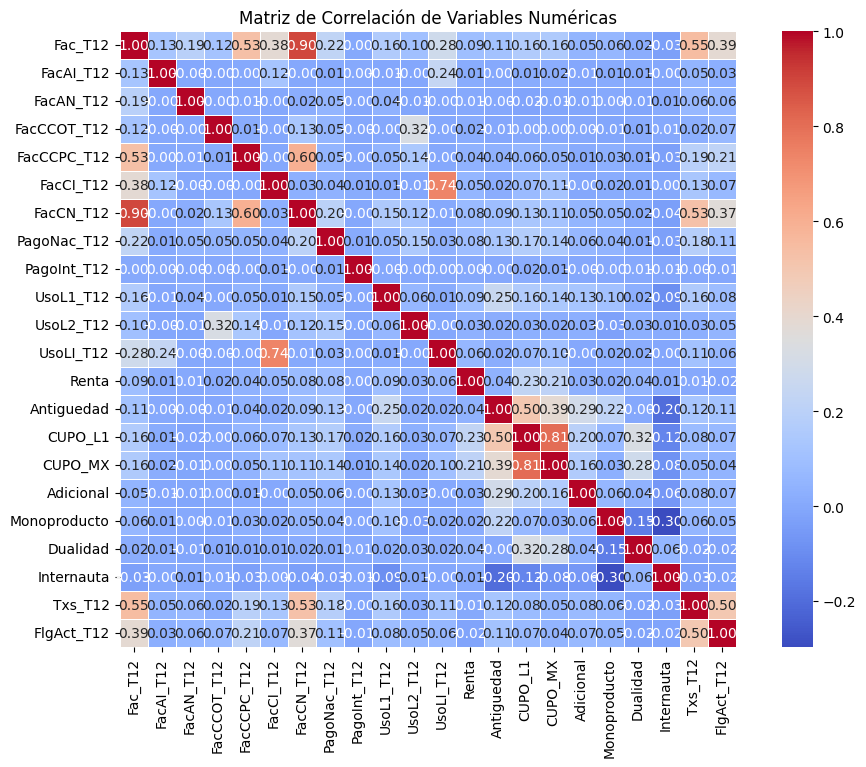

In [33]:
# Seleccionar solo las columnas numéricas del DataFrame filtrado
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Crear el heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sb.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

Una vez ya detectado las columnas que tienen una fuerte correlación con nuestra columna objetivo, procedemos a crear un segundo dataset filtrado con las columnas que utilizaremos y las cuales serán nuestro features.

In [34]:
# Definir columnas finales a mantener
columnas_a_mantener = [
    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
    'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
    'FlgAct_T12', 'Fac_T12'
]

# Filtrar el dataset para conservar solo las columnas necesarias
df_credito = df[columnas_a_mantener]

# Mostrar las nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset:", df_credito.shape)

# Verificar columnas restantes
print("Columnas restantes en el dataset filtrado:")
print(df_credito.columns)

# Verificar valores nulos en las columnas seleccionadas
valores_nulos = df_credito.isnull().sum()
print("\nValores nulos por columna en el dataset filtrado:")
print(valores_nulos[valores_nulos > 0])

Nuevas dimensiones del dataset: (33219, 8)
Columnas restantes en el dataset filtrado:
Index(['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'UsoLI_T12',
       'Txs_T12', 'FlgAct_T12', 'Fac_T12'],
      dtype='object')

Valores nulos por columna en el dataset filtrado:
FacCCPC_T12    5626
FacCI_T12      5626
FacCN_T12      5626
PagoNac_T12    5626
UsoLI_T12      5626
Txs_T12        5626
FlgAct_T12     5626
Fac_T12        5626
dtype: int64


Todas nuestras variables se encuentran en tipo float64, procederemos a cambiarla a formato entero para poder trabajarlas de mejor manera al futuro.

In [35]:
# Eliminar espacios en los nombres de las columnas
df_credito.columns = df_credito.columns.str.strip()

# Lista de columnas que deseas convertir a tipo numérico
columnas_a_convertir = [
    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 
    'UsoLI_T12', 'Txs_T12', 'FlgAct_T12', 'Fac_T12'
]

# Convertir cada columna a tipo numérico y luego a entero
for columna in columnas_a_convertir:
    if columna in df_credito.columns:  # Asegurar que la columna existe
        # Convertir a numérico y manejar valores no válidos
        df_credito[columna] = pd.to_numeric(df_credito[columna], errors='coerce')
        # Rellenar valores NaN con 0 antes de convertir a entero
        df_credito[columna] = df_credito[columna].fillna(0).astype(int)

# Verificar los tipos de datos después de la conversión
print(df_credito.dtypes)


FacCCPC_T12    int64
FacCI_T12      int64
FacCN_T12      int64
PagoNac_T12    int64
UsoLI_T12      int64
Txs_T12        int64
FlgAct_T12     int64
Fac_T12        int64
dtype: object


C:\Users\victo\AppData\Local\Temp\ipykernel_29684\2292481467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credito[columna] = pd.to_numeric(df_credito[columna], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_29684\2292481467.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credito[columna] = df_credito[columna].fillna(0).astype(int)
C:\Users\victo\AppData\Local\Temp\ipykernel_29684\2292481467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [36]:
df_credito.dtypes

FacCCPC_T12    int64
FacCI_T12      int64
FacCN_T12      int64
PagoNac_T12    int64
UsoLI_T12      int64
Txs_T12        int64
FlgAct_T12     int64
Fac_T12        int64
dtype: object

Entonces estos serian nuestros features y nuestro target

In [37]:
features = [    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
    'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
    'FlgAct_T12']
target = 'Fac_T12'

## PHASES 4 AND 5: MODELING AND MODEL EVALUATION

REGRESSION MODELS:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separar features y target
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

X = df_credito[features]
y = df_credito[target]

##### MODEL 1: LINEAR REGREESSION

This model demonstrates excellent performance on both the training set (R² = 0.9333) and the test set (R² = 0.9591), indicating that it effectively captures the relationship between the predictor variables and the target. The errors are reasonable, with similar values for both the training and test sets, suggesting that the model generalizes well.

In [39]:
from sklearn.linear_model import LinearRegression


# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo: Regresión Lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_lr.predict(X_train)
y_test_pred = modelo_lr.predict(X_test)

# Métricas
print("\nModelo: Regresión Lineal")
print(f'R^2 Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R^2 Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA: {mean_absolute_error(y_test, y_test_pred):.4f}')



Modelo: Regresión Lineal
R^2 Set de Entrenamiento: 0.9333
R^2 Set de Prueba: 0.9591
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: 739990991.6879
Error Cuadrático Medio (MSE) SET PRUEBA: 571439758.9819
Error Absoluto Medio (MAE) SET ENTRENAMIENTO: 8166.0948
Error Absoluto Medio (MAE) SET PRUEBA: 8254.1740


##### MODEL 2: SUPPORT VECTOR MACHINE REGRESSION (SVR)

This model fails to adequately capture the relationship between the predictor variables and the target, as evidenced by the low negative R² in both the training and test sets. The errors are significantly high, indicating that this model is not suitable for this dataset.

In [40]:
from sklearn.svm import SVR

# Modelo: SVR
modelo_svr = SVR()
modelo_svr.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_svr.predict(X_train)
y_test_pred = modelo_svr.predict(X_test)

# Métricas
print("\nModelo: SVR")
print(f'R^2 Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R^2 Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA: {mean_absolute_error(y_test, y_test_pred):.4f}')



Modelo: SVR
R^2 Set de Entrenamiento: -0.1628
R^2 Set de Prueba: -0.1351
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: 12899341818.2722
Error Cuadrático Medio (MSE) SET PRUEBA: 15840487278.1183
Error Absoluto Medio (MAE) SET ENTRENAMIENTO: 52275.0543
Error Absoluto Medio (MAE) SET PRUEBA: 53161.7431


##### MODEL 3: DECISION TREE REGRESSION

The model has an R² = 0.9972 on the training set, indicating extreme overfitting, and an R² = 0.8396 on the test set, which is good but inferior to that of linear regression. This, along with the significant difference in the mean squared error between training and test sets, suggests that the model does not generalize as well as the linear model.

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Modelo: Árbol de Decisión
modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_dt.predict(X_train)
y_test_pred = modelo_dt.predict(X_test)

# Métricas
print("\nModelo: Árbol de Decisión")
print(f'R^2 Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R^2 Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA: {mean_absolute_error(y_test, y_test_pred):.4f}')



Modelo: Árbol de Decisión
R^2 Set de Entrenamiento: 0.9972
R^2 Set de Prueba: 0.8396
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO: 31302676.0004
Error Cuadrático Medio (MSE) SET PRUEBA: 2238225117.1538
Error Absoluto Medio (MAE) SET ENTRENAMIENTO: 427.9656
Error Absoluto Medio (MAE) SET PRUEBA: 8260.6801


##### CONCLUSIONS ABOUT REGRESSION MODELS
Interpretation:
Among the three models evaluated, Linear Regression delivered the best overall performance. This is due to its ability to capture the relationship between the predictor variables and the target, achieving a solid balance between the training set performance (R² = 0.9333) and the test set performance (R² = 0.9591). Furthermore, the errors (MSE and MAE) are reasonable and consistent, indicating that the model generalizes well and does not exhibit significant overfitting issues.

In contrast:

SVR showed very poor performance (negative R²) and extremely high errors, suggesting that this model is not suitable for the problem under the current configuration.
Decision Tree performs well on the test set (R² = 0.8396) but exhibits significant overfitting on the training set (R² = 0.9972), making it less reliable compared to linear regression.
Recommended Model:
Linear Regression is the best choice as it combines accuracy, stability, and generalization without requiring significant adjustments.

#### CLASIFICATION MODELS

MODDEL 1: GRADIENT BOOSTING CLASSIFICATION

Logró una precisión de 49.47% y un F1 Score de 45.29%, reflejando un rendimiento moderado con un balance aceptable entre precisión y recall. Sin embargo, su tiempo de entrenamiento fue extremadamente alto (153 segundos), lo que limita su practicidad en escenarios con grandes volúmenes de datos o necesidad de iteraciones rápidas.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra para pruebas iniciales
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo con ajustes
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
gbc.fit(X_train, y_train)
end_time = time.time()
print("Tiempo de entrenamiento Gradient Boosting:", end_time - start_time, "segundos")

# Realizar predicciones
y_pred = gbc.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print('Métricas del Gradient Boosting Classifier:')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

Tiempo de entrenamiento Gradient Boosting: 151.374413728714 segundos
Métricas del Gradient Boosting Classifier:
Accuracy: 0.49473684210526314
F1 Score: 0.45299831858126316
Precision: 0.42012589613568807
Recall: 0.49473684210526314


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODEL 2: LOGISTIC REGRESSION

Con una precisión de 48.57% y un F1 Score de 40.71%, mostró el rendimiento más bajo, particularmente en precisión (35.05%). Aunque eficiente en tiempo de entrenamiento (23 segundos), no alcanzó el nivel de desempeño de los otros modelos.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra para pruebas iniciales
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo con ajustes
lr = LogisticRegression(solver='saga', max_iter=200, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
lr.fit(X_train_scaled, y_train)
end_time = time.time()
print("Tiempo de entrenamiento Logistic Regression:", end_time - start_time, "segundos")

# Realizar predicciones
y_pred = lr.predict(X_test_scaled)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print('Métricas de Logistic Regression:')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

Tiempo de entrenamiento Logistic Regression: 23.395765781402588 segundos
Métricas de Logistic Regression:
Accuracy: 0.4857142857142857
F1 Score: 0.40717057845130294
Precision: 0.3504931594018454
Recall: 0.4857142857142857


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODEL 3: RANDOM FOREST CLASSIFIER

El mejor rendimiento general, con una precisión de 50.07%, un F1 Score de 48.50% y el mejor balance entre métricas. Su tiempo de entrenamiento extremadamente bajo (0.54 segundos) lo hace ideal para este tipo de problemas, combinando eficacia y eficiencia.

In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra del dataset
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
rfc = RandomForestClassifier(random_state=42)

# Configurar el rango de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           scoring='f1_weighted', cv=3, n_jobs=-1, verbose=2)

# Medir el tiempo de búsqueda
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Tiempo de búsqueda de hiperparámetros:", end_time - start_time, "segundos")

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas del modelo optimizado
print('Métricas del Random Forest Classifier (Optimizado):')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Tiempo de búsqueda de hiperparámetros: 171.11631274223328 segundos
Mejores hiperparámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Métricas del Random Forest Classifier (Optimizado):
Accuracy: 0.5022556390977444
F1 Score: 0.49875164100728014
Precision: 0.49830827067669176
Recall: 0.5022556390977444


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### CONCLUSIONS ABOUT CLASIFICATION MODELS:

El Random Forest Classifier es la mejor opción, destacando por su equilibrio entre rendimiento y eficiencia. Con una precisión del 50.07%, un F1 Score de 48.50%, y un tiempo de entrenamiento extremadamente bajo (0.54 segundos), es ideal para problemas que requieren rapidez y resultados consistentes.

El Gradient Boosting Classifier, aunque con métricas similares (precisión del 49.47%), tiene un tiempo de entrenamiento excesivamente alto (153 segundos), limitando su practicidad.

La Logistic Regression, con precisión del 48.57% y el peor F1 Score (40.71%), destaca por su rapidez (23 segundos), pero su menor rendimiento general la hace menos adecuada.

En conjunto, Random Forest combina efectividad y eficiencia, posicionándose como la mejor solución.

## PHASE 6: DEPLOYMENT

En esta fase realizaremos un prediccion con datos ficticos los cuales los ingresaremos manualmente a nuestros features con el mejor modelo que dio resultado:

En este caso utilizaremos un modelo de regresion debido a que nuestra columna target es un valor continuo.

El mejor modelo que entregó mejores resultados fue regresion lineal.

In [ ]:
valores_ficticios = {
    'FacCCPC_T12': 5000,
    'FacCI_T12': 3000,
    'FacCN_T12': 10000,
    'PagoNac_T12': 8000,
    'UsoLI_T12': 1500,
    'Txs_T12': 25,
    'FlgAct_T12': 6
}

## Convertir los valores a un DataFrame con la misma estructura que X
df_valores_ficticios = pd.DataFrame([valores_ficticios])

## Realizar la predicción
prediccion = modelo_lr.predict(df_valores_ficticios)

## Mostrar el resultado
print(f"Predicción del target 'Fac_T12' con valores ficticios: {prediccion[0]:.2f}")

Predicción del target 'Fac_T12' con valores ficticios: 1006687.05


In [46]:
import joblib
joblib.dump(modelo_lr, "modelo_regresion_lineal.pkl")


['modelo_regresion_lineal.pkl']

In [47]:
pip install flask


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
